In [51]:
import networkx as nx # make sure networkx is installed (https://pypi.org/project/networkx/#description)
import matplotlib.pyplot as plt
import datetime
import csv
import random
import collections
import math
import numpy as np

#Problem 1

In [2]:
G1 = nx.Graph()
G1.add_nodes_from(['v1','v2','v3','v4','v5','v6', 'v7'])

G1.add_edges_from([('v1', 'v2'), ('v1', 'v2'), ('v1', 'v3'), ('v1', 'v5'), ('v2', 'v3'), ('v2', 'v4'), ('v2', 'v7'), ('v3', 'v4'), ('v3', 'v5'), ('v3', 'v6'), ('v4', 'v6'), ('v5', 'v6'), ('v6', 'v7')])

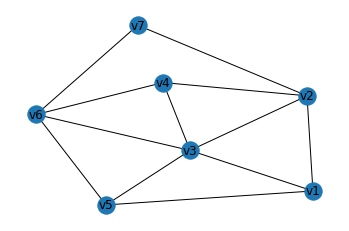

In [3]:
pos = nx.spring_layout(G1, seed=2)
nx.draw_networkx_labels(G1, pos)
nx.draw(G1,pos, connectionstyle='angle3')

#Part a
networkx global clustering coefficient = 0.46875

In [4]:
nx.transitivity(G1)

0.46875

#Part b
networkx local clustering coefficient 
v1 = 0.666
v2 = 0.333
v3 =0.5
v4 = 0.666
v5 = 0.666
v6 = 0.333
v7 = 0

In [5]:
nx.clustering(G1)

{'v1': 0.6666666666666666,
 'v2': 0.3333333333333333,
 'v3': 0.5,
 'v4': 0.6666666666666666,
 'v5': 0.6666666666666666,
 'v6': 0.3333333333333333,
 'v7': 0}

#Problem 2

#part a

In [24]:
FileName="soc-sign-epinions.txt"
Graphtype=nx.DiGraph()

# G2 = nx.read_edgelist(FileName, delimiter = '\t', create_using=Graphtype, nodetype=int )
G2 = nx.read_weighted_edgelist(FileName, delimiter = '\t', create_using=Graphtype  )

In [8]:
nx.info(G2)

'DiGraph with 131828 nodes and 841372 edges'

In [18]:
def compute_reciprocity(G):
  sparse_adj_G = nx.to_scipy_sparse_matrix(G, weight=None)
  G_squared = sparse_adj_G * sparse_adj_G
  traced_matrix = G_squared.diagonal().sum()
  reciprocity = traced_matrix / G.number_of_edges()

  return reciprocity

In [19]:
compute_reciprocity(G2)

0.3087231331682062

Calculated Reciprocity = 0.3087231

#part b

In [17]:
nx.reciprocity(G2)

0.308042102660892

Networkx reciprocity = 0.3080421

The value of the reciprocity is not exactly the same, but is close. Differing by about 0.00008. Reciprocity can be calculated on directed and weighted graphs. Perhaps the signed graph, representing trust, has an effect on the reciprocity. This could be because Other factors that can affect reciprocity include isolated nodes and self linking loops.

#Problem 3


#Part a
I used the graph from the first problem as an example of this working. There are two defined functions for jaccard and cosine similarities.

In [26]:
G3 = nx.Graph()
G3.add_nodes_from(['v1','v2','v3','v4','v5','v6', 'v7'])

G3.add_edges_from([('v1', 'v2'), ('v1', 'v2'), ('v1', 'v3'), ('v1', 'v5'), ('v2', 'v3'), ('v2', 'v4'), ('v2', 'v7'), ('v3', 'v4'), ('v3', 'v5'), ('v3', 'v6'), ('v4', 'v6'), ('v5', 'v6'), ('v6', 'v7')])

In [35]:
def compute_jaccard(G, node1, node2):
  
  node1_neighbors = [n for n in sorted(G.neighbors(node1))]
  node2_neighbors = [n for n in sorted(G.neighbors(node2))]

  intersection = len(list(set(node1_neighbors).intersection(node2_neighbors)))
  union = (len(node1_neighbors) + len(node2_neighbors)) - intersection
  return float(intersection) / union

In [37]:
jaccard = compute_jaccard(G3, 'v1', 'v2')
jaccard

0.16666666666666666

In [39]:
def compute_cosine(G, node1, node2):
  node1_neighbors = [n for n in sorted(G.neighbors(node1))]
  node2_neighbors = [n for n in sorted(G.neighbors(node2))]

  intersection = len(list(set(node1_neighbors).intersection(node2_neighbors)))
  denominator = math.sqrt((len(node1_neighbors) * len(node2_neighbors)))
  return float(intersection) / denominator

In [40]:
cosine = compute_cosine(G3, 'v1', 'v2')
cosine

0.2886751345948129

#Part b
This section took me about 9 minutes to run. The resulting graph I saved and displayed after the code. 

In [41]:
Data = open('/content/lastfm_asia_edges.csv', "r")
next(Data, None)  # skip the first line in the input file
Graphtype = nx.Graph()

G_lastfm = nx.parse_edgelist(Data, delimiter=',', create_using=Graphtype, nodetype=int, data=(('weight', int),))

In [43]:
jaccard_list = []
cosine_list = []

for n1 in G_lastfm.nodes():
  for n2 in G_lastfm.nodes():
    if n1 != n2:

        jaccard = compute_jaccard(G_lastfm, n1, n2)
        if jaccard != 0:
          jaccard_list.append(jaccard)

        cosine = compute_cosine(G_lastfm, n1, n2)
        if cosine != 0:
          cosine_list.append(cosine)

      

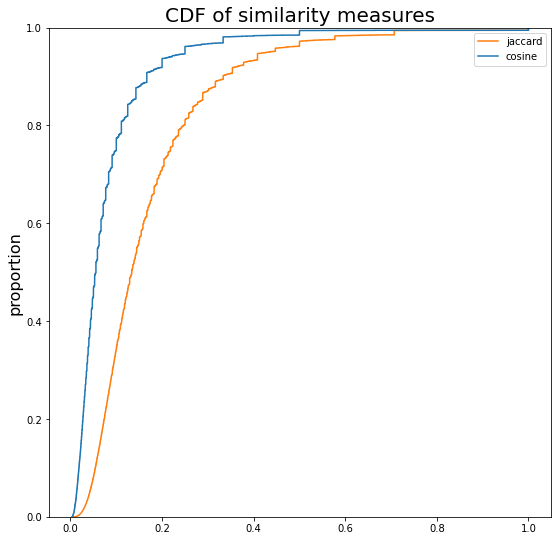

In [45]:
import seaborn
plt.figure(figsize=(9,9))
seaborn.ecdfplot((jaccard_list, cosine_list))
plt.legend(['jaccard', 'cosine'], fontsize = 10)
plt.title('CDF of similarity measures', fontsize= 20)
plt.ylabel('proportion', fontsize= 16)
plt.show()

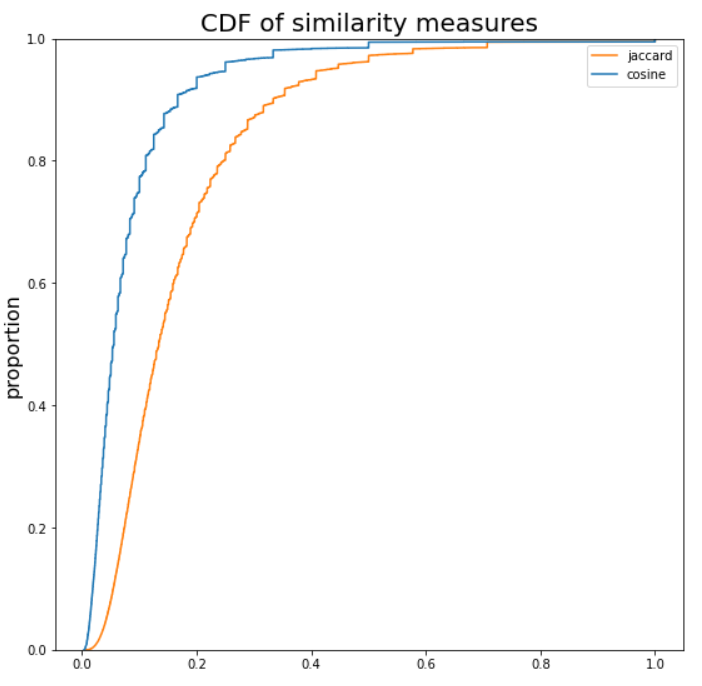

#Problem 4

In [56]:
G4 = nx.Graph()
G4.add_nodes_from(['v1','v2','v3','v4','v5'])

G4.add_edges_from([('v1', 'v2'), ('v1', 'v3'), ('v2', 'v4'), ('v2', 'v5'), ('v3', 'v4'), ('v4', 'v5')])

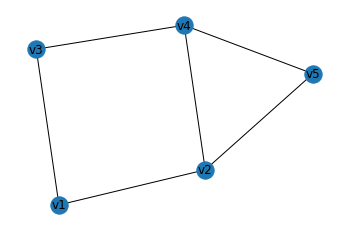

In [50]:
pos = nx.spring_layout(G4, seed=0)
nx.draw_networkx_labels(G4, pos)
nx.draw(G4,pos, connectionstyle='angle3')

In [68]:
alpha = 0
G4_adj_numpy = nx.to_numpy_matrix(G4)
alpha = (1 / max(np.linalg.eigvals(G4_adj_numpy)))
print(alpha)

0.40303171676268496


In [65]:
reg_matrix = np.linalg.inv(np.identity(5) - (0.3*G4_adj_numpy))

In [66]:
reg_matrix.view()

matrix([[1.35515511, 0.64119526, 0.54265511, 0.45369526, 0.32846715],
        [0.64119526, 1.68362226, 0.45369526, 0.87112226, 0.76642336],
        [0.54265511, 0.45369526, 1.35515511, 0.64119526, 0.32846715],
        [0.45369526, 0.87112226, 0.64119526, 1.68362226, 0.76642336],
        [0.32846715, 0.76642336, 0.32846715, 0.76642336, 1.45985401]])

The calculated regular equivalence for the nodes is shown with the above code. The matrix produced is the regualar equivalence between the nodes. I chose an alpha value of 0.3. I checked the maximum alpha value above using the eigenvalues and it was about 0.4. I knew the alpha value used must be less than that. 

#Problem 5 
A real life signed network that I am interested in is reddit. Or at least it can be viewed that way. Users upvote or downvote posts. Upvotes could represent a positive 1 connection and a downvote a negative -1 connection. Social balance theory is the idea of a relation of two or more individuals or groups to a 3rd relation. On reddit, total upvotes and downvotes are summed and then used (by some hidden algorithms) to sort post poularity and what is shown to users. In terms of social balance user to user groups are largely uneffected other than sentiments in comments and so on. But the popularity of a post and what is recommended is affected by the signed relation. 